#                                                            ASSIGNMENT 1

In [17]:
import pandas as pd
df=pd.read_csv(r'heart.csv')
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

### a) Find Shape of Data

In [18]:
shape=df.shape
print("Shape of the data is:")
print(shape)

Shape of the data is:
(303, 14)


### b) Find Missing Values

In [19]:
missing=df.isnull().sum()
print("Missing values of the data are:")
print(missing)

Missing values of the data are:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


### c) Find data type of each column

In [20]:
type=df.dtypes
print("The datatypes are:")
print(type)

The datatypes are:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


### d) Finding out Zero's

In [21]:
zero_count=(df==0).sum()
print("Number of zeros present")
print(zero_count)

Number of zeros present
age           0
sex          96
cp          143
trtbps        0
chol          0
fbs         258
restecg     147
thalachh      0
exng        204
oldpeak      99
slp          21
caa         175
thall         2
output      138
dtype: int64


### e) Mean age of patients

In [22]:
mean_age=df['age'].mean()
print("Mean age is:")
print(mean_age)

Mean age is:
54.366336633663366


### f) Extract only Age, Sex, ChestPain, Chol. Randomly divide dataset in training(75%) and testing (25%).

In [23]:
from sklearn.model_selection import train_test_split

selected_columns=["age","sex","cp","chol"]
X=df[selected_columns]
y=df['output']
    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print("X_train")
print(X_train)
print("\nX_test")
print(X_test)
    
print("\ny_train")
print(y_train)
print("\ny_test")
print(y_test)

X_train
     age  sex  cp  chol
287   57    1   1   232
282   59    1   2   218
197   67    1   0   254
158   58    1   1   220
164   38    1   2   175
..   ...  ...  ..   ...
188   50    1   2   233
71    51    1   2   227
106   69    1   3   234
270   46    1   0   249
102   63    0   1   195

[227 rows x 4 columns]

X_test
     age  sex  cp  chol
179   57    1   0   276
228   59    1   3   288
111   57    1   2   126
246   56    0   0   409
60    71    0   2   265
..   ...  ...  ..   ...
22    42    1   0   226
258   62    0   0   244
56    48    1   0   222
242   64    1   0   212
114   55    1   1   262

[76 rows x 4 columns]

y_train
287    0
282    0
197    0
158    1
164    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 227, dtype: int64

y_test
179    0
228    0
111    1
246    0
60     1
      ..
22     1
258    0
56     1
242    0
114    1
Name: output, Length: 76, dtype: int64


### Confusion matrix and performance score for the above dataset

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")


 Confusion Matrix:
[[29  6]
 [12 29]]
Accuracy: 0.7631578947368421
Precision: 0.8285714285714286
Recall: 0.7073170731707317
F1-Score: 0.7631578947368421


### Graphical representation of performance metrics for the above dataset

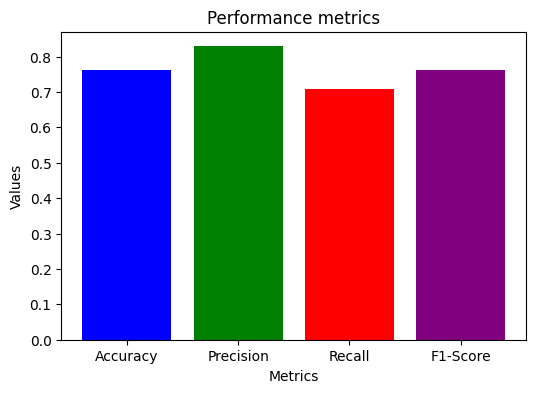

In [25]:
import matplotlib.pyplot as plt

labels=['Accuracy','Precision','Recall','F1-Score']
values=[accuracy,precision,recall,f1]

plt.figure(figsize=(6,4))
plt.bar(labels,values,color=['blue','green','red','purple'])

plt.title('Performance metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.show()

### Confusion Matrix

Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were actually positive. Total 50 people in my sample were actually COVID positive. I have total 500 samples.


In [26]:
total_samples = 500
predicted_positive = 100
actual_positive = 50
true_positive = 45


true_negative = total_samples - predicted_positive - actual_positive + true_positive
false_positive = predicted_positive - true_positive
false_negative = actual_positive - true_positive

accuracy = (true_positive + true_negative) / total_samples
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

confusion_matrix = [[true_positive, false_positive], [true_negative,false_negative]]

print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Confusion Matrix:
[45, 55]
[395, 5]

Accuracy: 0.88
Precision: 0.45
Recall: 0.9
F1 Score: 0.6


#### Graphical representation of performance metrics for the above data

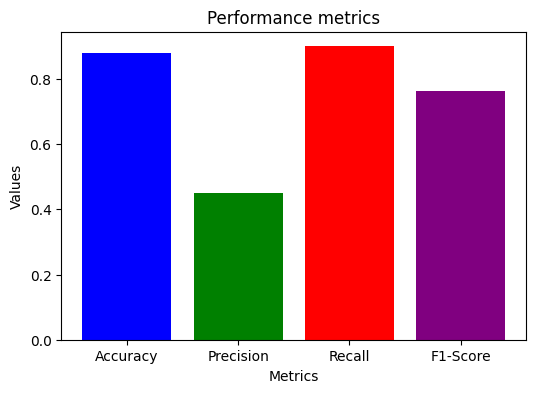

In [27]:
import matplotlib.pyplot as plt

labels=['Accuracy','Precision','Recall','F1-Score']
values=[accuracy,precision,recall,f1]

plt.figure(figsize=(6,4))
plt.bar(labels,values,color=['blue','green','red','purple'])

plt.title('Performance metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.show()